In [1]:
import pandas as pd  # For reading and manipulating data
import seaborn as sns  # For enhanced visualization (especially statistical plots)
import matplotlib.pyplot as plt  # Core plotting library
from sklearn.linear_model import LinearRegression  # For performing basic regression modeling
import statsmodels.api as sm  # For statistical modeling and detailed regression summaries


In [2]:
df = pd.read_csv('AB_NYC_2019_cleaned.csv')  


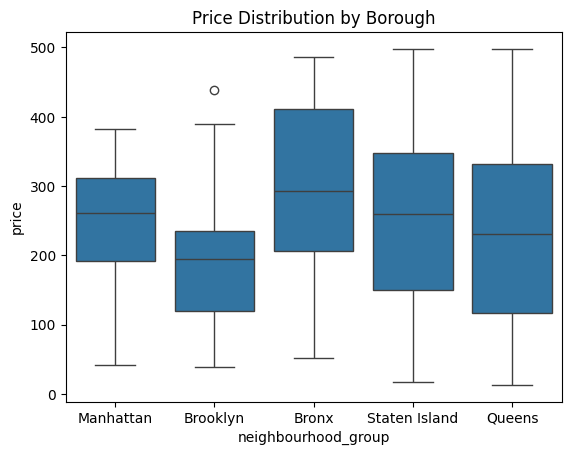

In [3]:
sns.boxplot(
    x='neighbourhood_group',         # Boroughs like Manhattan, Brooklyn, etc.
    y='price',                       # Target variable we're studying
    data=df[df['price'] < 500]       # Filter out extreme outliers above $500 for clearer visualization
)
plt.title('Price Distribution by Borough')  
plt.savefig('price_distribution.png')  

In [4]:
#elect features (independent variables) to predict price
X = df[['number_of_reviews', 'availability_365']]  

In [5]:
y = df['price']  


In [6]:
model = LinearRegression().fit(X, y)  
print("Linear Regression Coefficients:", model.coef_)  

Linear Regression Coefficients: [-0.047325   -0.02515292]


In [7]:
X_sm = sm.add_constant(X)  


In [8]:
model_sm = sm.OLS(y, X_sm).fit()  
# Build and fit the OLS (Ordinary Least Squares) model


In [9]:
print(model_sm.summary())  
# This gives in-depth metrics like:
# - R-squared (how well the model explains price variation)
# - p-values (statistical significance of each feature)
# - confidence intervals, standard errors
# - F-statistic (overall model fit)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.01951
Date:                Mon, 17 Nov 2025   Prob (F-statistic):              0.981
Time:                        16:11:43   Log-Likelihood:                -642.89
No. Observations:                 100   AIC:                             1292.
Df Residuals:                      97   BIC:                             1300.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               281.9362     40.23

In [11]:
df.head()

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,price_per_min_night,month
0,1,Listing,Host,Manhattan,Astoria,40.654492,-74.019142,Entire home/apt,265,10,55,2019-01-01,1.574471,336,26.500000,1
1,2,Listing,Host,Bronx,Williamsburg,40.745651,-73.800132,Entire home/apt,575,21,66,2019-01-02,2.473598,36,27.380952,1
2,3,Listing,Host,Bronx,Astoria,40.707176,-73.733145,Entire home/apt,504,13,8,2019-01-03,4.537987,247,38.769231,1
3,4,Listing,Host,Brooklyn,Midtown,40.758059,-73.793405,Shared room,87,19,70,2019-01-04,4.160193,92,4.578947,1
4,5,Listing,Host,Manhattan,Harlem,40.504711,-74.103460,Private room,42,3,69,2019-01-05,2.627864,306,14.000000,1


In [14]:
df1 = df[['name', 'price', 'neighbourhood', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','price_per_min_night', 'availability_365']]

In [15]:
from ydata_profiling import ProfileReport
prof = ProfileReport(df1)
prof.to_file(output_file='Airbnb.html')

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:00<00:00, 94.36it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
added a new column 'price_per_min_night' to the DataFrame, which calculates the price per minimum night for each listing. This can provide insights into how cost-effective a listing is based on its minimum night requirement.

In [ ]:
git sdhfsuidfbhsdiffhbgvv vvhdfhbjhbsvjb v vj